In [1]:
import pandas as pd
import numpy as np

import re
import string
import os

import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('tweets_data.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df.shape

(7613, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

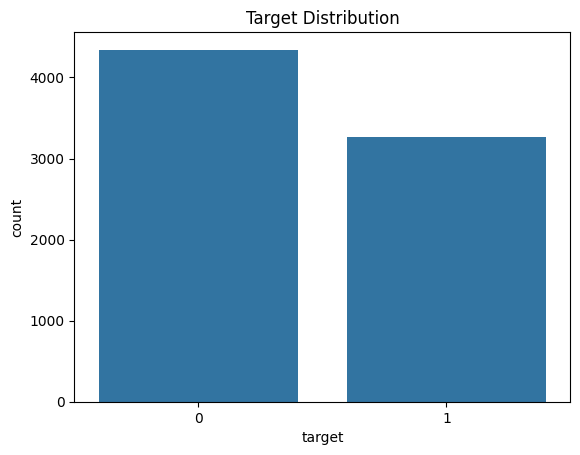

In [6]:
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()

### Pre-Processing

In [ ]:
# this is a python package for pre-processing text by KGPTalkie
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git
import preprocess_kgptalkie as kgp

In [8]:
df = kgp.get_basic_features(df)
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


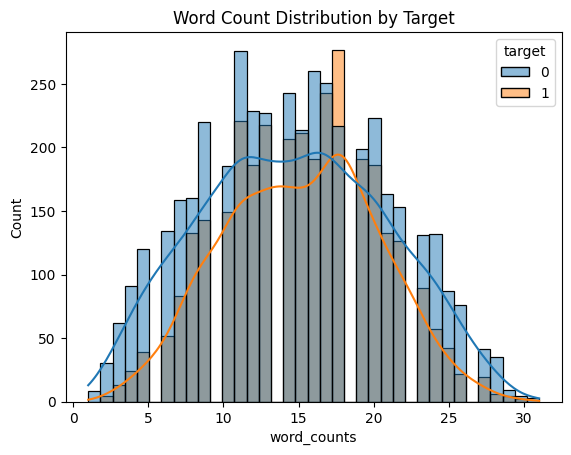

In [9]:
sns.histplot(data=df, x='word_counts', hue='target', kde=True)
plt.title('Word Count Distribution by Target')
plt.show()

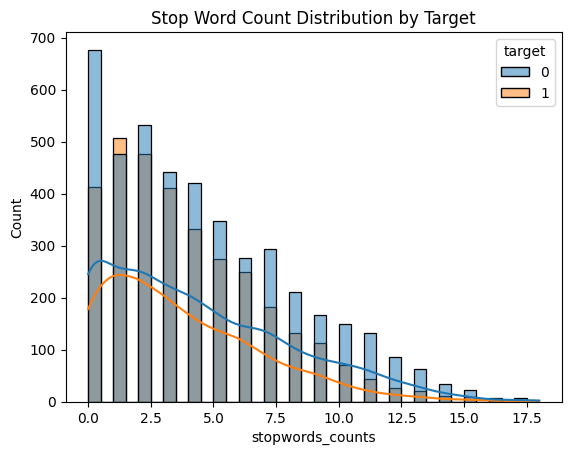

In [10]:
sns.histplot(data=df, x='stopwords_counts', hue='target', kde=True)
plt.title('Stop Word Count Distribution by Target')
plt.show()

In [11]:
# data cleaning
def get_clean(x):
    x = str(x).lower().replace('\\', ' ').replace('_', ' ').replace('.', ' ')
    x = kgp.cont_exp(x)
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = kgp.remove_dups_char(x)
    return x

In [12]:
df['clean_text'] = df['text'].apply(lambda x: get_clean(x))
df.head()

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0,130 people receive wildfires evacuation orders...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0,just got sent this photo from ruby alaska as s...


In [13]:
# get most common words
freqs = kgp.get_word_freqs(df, 'text')

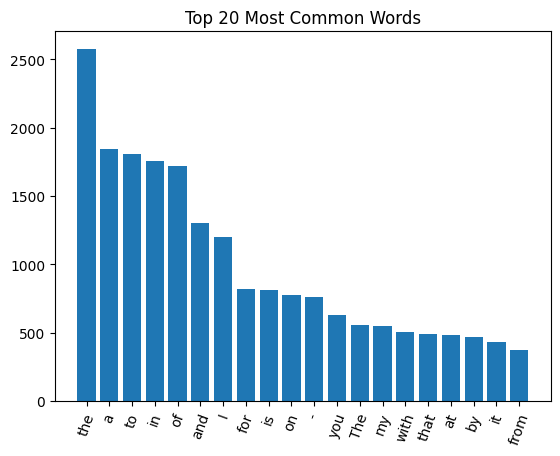

In [14]:
top20 = freqs[:20]
plt.bar(top20.index, top20.values)
plt.xticks(rotation=70)
plt.title('Top 20 Most Common Words')
plt.show()

### Disaster Words Visualization with Word Cloud

In [15]:
from wordcloud import WordCloud

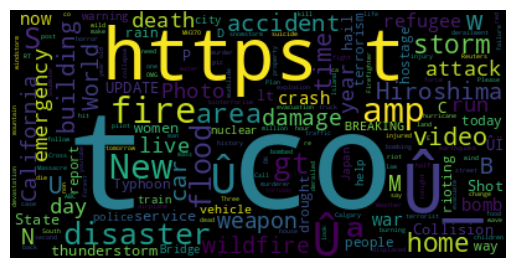

In [16]:
disaster_tweets = kgp.get_word_freqs(df[df['target']==1], 'text')
disaster_words = ' '.join(disaster_tweets.index)
disaster_wordcloud = WordCloud(random_state=21, max_font_size=110).generate(disaster_words)
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
df.to_csv('training_data.csv', index=False)